In [ ]:
# Data source - https://drive.google.com/file/d/1UD-L5kDjSdhBBFRQKUTnOCQ5StQQm1SU/view?usp=drive_link

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Churn_Modelling.csv')
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 10000 rows and 14 columns.


In [ ]:
# Data sample
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Data type of each column
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Missing value check
# data.isnull().sum()                  # Count of missing value in each attribute
round(data.isnull().mean()*100, 2)   # Percentage of missing value in each attribute

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


## Prepare the data for DL

In [ ]:
# data sample
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Split the data into independent and dependent
x = data.iloc[:, 3:-1]
y = data.iloc[:, 13]

In [ ]:
# One hot encoding
x = pd.get_dummies(x, drop_first=True, dtype='int')
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# train test split of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Data scaling - normalization
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [ ]:
# converting the scaled array into dataframe
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=scale.get_feature_names_out())
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=scale.get_feature_names_out())

In [ ]:
# Build ANN Architecture

    # 1. Initalize model as sequential
    # 2. add layers (input, hidden, output) along with activation functions, weight intializer
    # 3. metrics, loss, optimizer

In [ ]:
# Importing required libraries for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# package version
print(keras.__version__)

3.4.1


In [ ]:
# Building the ANN Acrchitecture

# --- FEED FORWARD MECHANISM ---- # (Forward Propagation)

# intialize the model
model = Sequential()

# Building the layers
# input layer
model.add(Dense(units=11, kernel_initializer='he_uniform', input_dim=11))  # unit: no.of.neurons

# first hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))

# second hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform'))

# output layer
model.add(Dense(units=1, activation='sigmoid'))   # sigmoid - classification problem


# --- BACK PROPAGATION ---- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ANN Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train_scaled.shape

(8000, 11)

In [ ]:
8000*0.7

5600.0

In [ ]:
# Fitting the data inside the network architecture
model_history = model.fit(x_train_scaled, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6845 - loss: 0.6131 - val_accuracy: 0.7875 - val_loss: 0.4914
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8038 - loss: 0.4654 - val_accuracy: 0.7933 - val_loss: 0.4647
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7993 - loss: 0.4465 - val_accuracy: 0.7996 - val_loss: 0.4529
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8098 - loss: 0.4347 - val_accuracy: 0.8075 - val_loss: 0.4445
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.4223 - val_accuracy: 0.8146 - val_loss: 0.4389
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4233 - val_accuracy: 0.8142 - val_loss: 0.4347
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8177 - loss: 0.4155 - val_accuracy: 0.8200 - val_loss: 0.4287
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8215 - loss: 0.4125 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


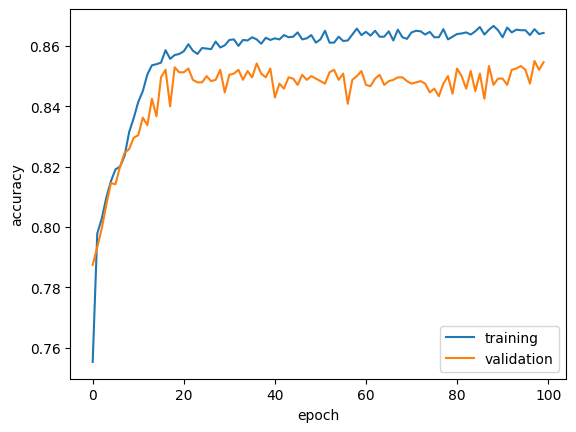

In [ ]:
# Plot the accuracy vs val_accuracy
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


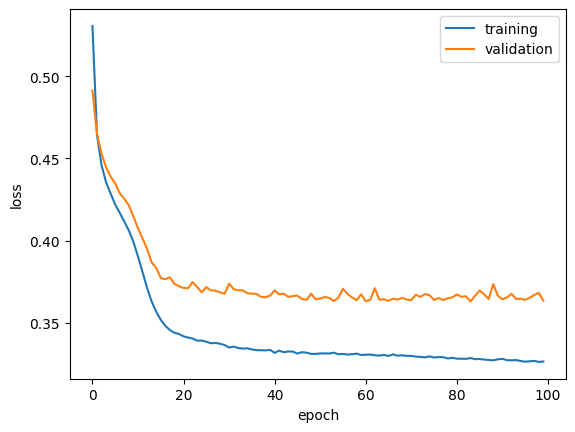

In [ ]:
# Plot the loss vs val_loss
print(model_history.history.keys())

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# predicting the results
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Testing Accuracy: 0.8575


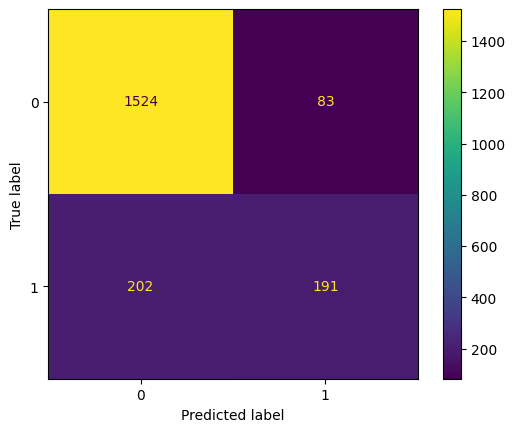

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print(report)

# Testing Score
score = accuracy_score(y_pred, y_test)
print('Testing Accuracy:', score)

In [ ]:
round(data['Exited'].value_counts(normalize=True)*100, 2)

,proportion
Exited,
0,79.63
1,20.37
